In [236]:
import pandas as pd #...................................................to load and manipulate data
import numpy as np #....................................................to calculation
import seaborn as sns #.................................................to plot the heatmap

from matplotlib import pyplot as plt #..................................to plot graphs
from sklearn import neighbors #.........................................to find the nearest neighbour
from sklearn.model_selection import train_test_split #..................to split the data into training and testing sets
from sklearn.metrics import accuracy_score #............................to check the accuracy score
from sklearn import preprocessing #.....................................
from sklearn.tree import DecisionTreeClassifier #.......................to buid a classification tree
from sklearn.preprocessing import MinMaxScaler #........................
from ipywidgets import interactive #....................................to create interactive charts
from sklearn.metrics import normalized_mutual_info_score #..............to calculate normalised mutual information

%matplotlib inline

Data_w = pd.read_csv("weather_data.csv")
Data_p = pd.read_csv("price_demand_data.csv")

Data_w


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,24/08/2021,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,25/08/2021,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,29/08/2021,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [177]:
 #check the data types 
Data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               218 non-null    object 
 1   Minimum temperature (°C)           218 non-null    float64
 2   Maximum temperature (°C)           218 non-null    float64
 3   Rainfall (mm)                      218 non-null    float64
 4   Evaporation (mm)                   218 non-null    float64
 5   Sunshine (hours)                   218 non-null    float64
 6   Direction of maximum wind gust     218 non-null    object 
 7   Speed of maximum wind gust (km/h)  218 non-null    int64  
 8   Time of maximum wind gust          218 non-null    object 
 9   9am Temperature (°C)               218 non-null    float64
 10  9am relative humidity (%)          218 non-null    int64  
 11  9am cloud amount (oktas)           218 non-null    int64  

In [178]:
# change the Date column into date time format
Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [179]:
# the date type has been changed to date time format, assign to original 
Data_w["Date"] = Data_w["Date"] = pd.to_datetime(Data_w["Date"])
Data_w["Date"]

0     2021-01-01
1     2021-02-01
2     2021-03-01
3     2021-04-01
4     2021-05-01
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [180]:
# Load DataFrame table
Data_w

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


In [181]:
#Seprating Dates & Time in diffrent coloumn


Data_p['Date'] = pd. to_datetime(Data_p['SETTLEMENTDATE']). dt. date
Data_p['Time'] = pd. to_datetime(Data_p['SETTLEMENTDATE']). dt. time

display(Data_p.head(10))

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
5,VIC1,1/01/2021 3:00,3549.37,LOW,2021-01-01,03:00:00
6,VIC1,1/01/2021 3:30,3504.17,LOW,2021-01-01,03:30:00
7,VIC1,1/01/2021 4:00,3547.90,LOW,2021-01-01,04:00:00
8,VIC1,1/01/2021 4:30,3579.11,LOW,2021-01-01,04:30:00
9,VIC1,1/01/2021 5:00,3580.77,LOW,2021-01-01,05:00:00


In [114]:
# Load Data Table
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00


In [183]:
# Check the data type in all the columns
Data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
 4   Date            11664 non-null  object 
 5   Time            11664 non-null  object 
dtypes: float64(1), object(5)
memory usage: 546.9+ KB


In [184]:
# We need to extract the dates from date_time data from the settlement date column, for that we convert the column type to datetime format instead of object type
Data_p["Date"] = pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [185]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00


In [186]:
# convert the date into datetime format
Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [187]:
# assign to original
Data_p["Date"]=Data_p["Date"]= pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-01-09
Name: Date, Length: 11664, dtype: datetime64[ns]

In [188]:
#Now make them as groups and find the max value_DataMining
Data_pg = Data_p.groupby("Date").max("TOTALDEMAND")
Data_pg

,TOTALDEMAND
Date,
2021-01-01,5019.64
2021-01-02,5228.29
2021-01-03,5225.37
2021-01-04,5807.02
2021-01-05,5261.09
...,...
2021-12-04,6415.58
2021-12-05,6406.00
2021-12-06,6062.58


In [189]:
Data_p["TOTALDEMAND"].describe()

count    11664.000000
mean      4925.798454
std        876.407490
min       2708.530000
25%       4255.500000
50%       4803.755000
75%       5477.337500
max       8196.830000
Name: TOTALDEMAND, dtype: float64

In [190]:
#The merged dataframe is assigned as MergeData
MergeData = Data_w.merge(Data_pg, how = 'inner', on = 'Date') 
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-02-01,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-03-01,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-04-01,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-05-01,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,SE,17,1021.5,11.7,55,6,S,17,1021.6,6717.65
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SE,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,N,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,N,13,1011.4,12.8,84,7,S,6,1010.4,6227.89


In [191]:
#Now make them as groups and find the median value_DataMining
MergeData.groupby("Date").max()


,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,77,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
2021-01-02,13.4,20.3,0.0,7.4,1.6,S,33,21:08,16.9,76,...,N,7,1012.8,19.4,69,7,S,13,1011.9,5228.29
2021-01-03,13.8,21.7,0.0,6.4,6.3,S,44,18:35,16.6,72,...,SW,6,1012.3,19.7,67,6,S,15,1012.2,5225.37
2021-01-04,12.4,29.9,0.0,4.4,10.8,NW,20,11:49,14.4,86,...,NE,9,1024.3,28.7,30,3,SE,7,1021.6,5807.02
2021-01-05,11.2,24.6,0.0,5.4,7.1,N,33,12:48,14.9,63,...,NE,9,1027.3,24.2,35,7,N,17,1024.4,5261.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,14.9,30.3,0.0,4.0,10.1,N,26,12:35,17.9,94,...,N,7,1016.7,29.0,36,7,NE,9,1012.6,6115.65
2021-12-04,9.7,16.8,10.0,3.2,3.9,W,28,2:30,11.7,95,...,NW,6,1023.7,16.0,65,6,SW,11,1021.8,6415.58
2021-12-06,7.4,16.5,9.4,0.4,1.0,NW,33,12:32,12.7,85,...,NW,7,1014.4,15.5,61,7,W,11,1014.0,6062.58


In [192]:
MergeData = MergeData.groupby("Date").max()
MergeData

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,77,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
2021-01-02,13.4,20.3,0.0,7.4,1.6,S,33,21:08,16.9,76,...,N,7,1012.8,19.4,69,7,S,13,1011.9,5228.29
2021-01-03,13.8,21.7,0.0,6.4,6.3,S,44,18:35,16.6,72,...,SW,6,1012.3,19.7,67,6,S,15,1012.2,5225.37
2021-01-04,12.4,29.9,0.0,4.4,10.8,NW,20,11:49,14.4,86,...,NE,9,1024.3,28.7,30,3,SE,7,1021.6,5807.02
2021-01-05,11.2,24.6,0.0,5.4,7.1,N,33,12:48,14.9,63,...,NE,9,1027.3,24.2,35,7,N,17,1024.4,5261.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,14.9,30.3,0.0,4.0,10.1,N,26,12:35,17.9,94,...,N,7,1016.7,29.0,36,7,NE,9,1012.6,6115.65
2021-12-04,9.7,16.8,10.0,3.2,3.9,W,28,2:30,11.7,95,...,NW,6,1023.7,16.0,65,6,SW,11,1021.8,6415.58
2021-12-06,7.4,16.5,9.4,0.4,1.0,NW,33,12:32,12.7,85,...,NW,7,1014.4,15.5,61,7,W,11,1014.0,6062.58


<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='TOTALDEMAND'>

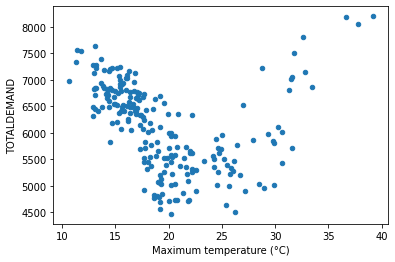

In [193]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'TOTALDEMAND')

In [19]:
#When the weather is extramly low or exreamly high, then the total demand increases, as people use the energy to maintain the temperature.

<AxesSubplot:xlabel='3pm Temperature (°C)', ylabel='TOTALDEMAND'>

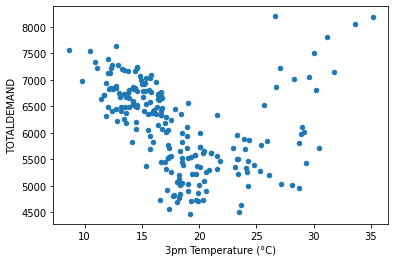

In [194]:
MergeData.plot.scatter (x = '3pm Temperature (°C)',
                        y = 'TOTALDEMAND')


In [21]:
# 3 pm is the time that the temperature goes up in summer.Therefore this chart was plotted to give a random idea on energy demand.


In [195]:
col = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['avg_temp'] = col.mean(axis = 1)
MergeData

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,avg_temp
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,77,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
2021-01-02,13.4,20.3,0.0,7.4,1.6,S,33,21:08,16.9,76,...,7,1012.8,19.4,69,7,S,13,1011.9,5228.29,16.85
2021-01-03,13.8,21.7,0.0,6.4,6.3,S,44,18:35,16.6,72,...,6,1012.3,19.7,67,6,S,15,1012.2,5225.37,17.75
2021-01-04,12.4,29.9,0.0,4.4,10.8,NW,20,11:49,14.4,86,...,9,1024.3,28.7,30,3,SE,7,1021.6,5807.02,21.15
2021-01-05,11.2,24.6,0.0,5.4,7.1,N,33,12:48,14.9,63,...,9,1027.3,24.2,35,7,N,17,1024.4,5261.09,17.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,14.9,30.3,0.0,4.0,10.1,N,26,12:35,17.9,94,...,7,1016.7,29.0,36,7,NE,9,1012.6,6115.65,22.60
2021-12-04,9.7,16.8,10.0,3.2,3.9,W,28,2:30,11.7,95,...,6,1023.7,16.0,65,6,SW,11,1021.8,6415.58,13.25
2021-12-06,7.4,16.5,9.4,0.4,1.0,NW,33,12:32,12.7,85,...,7,1014.4,15.5,61,7,W,11,1014.0,6062.58,11.95


<AxesSubplot:xlabel='avg_temp', ylabel='TOTALDEMAND'>

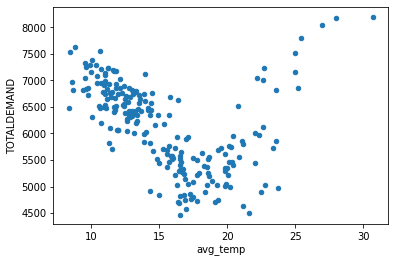

In [196]:
MergeData.plot.scatter (x = 'avg_temp',
                        y = 'TOTALDEMAND')

In [197]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00


In [198]:
Data_p.info()
#Data_p.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   REGION          11664 non-null  object        
 1   SETTLEMENTDATE  11664 non-null  object        
 2   TOTALDEMAND     11664 non-null  float64       
 3   PRICECATEGORY   11664 non-null  object        
 4   Date            11664 non-null  datetime64[ns]
 5   Time            11664 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 546.9+ KB


In [199]:
##load in the data
Data_p=pd.read_csv('price_demand_data.csv')

##get just the features
data=Data_p[['TOTALDEMAND']].astype(float)


##get just the class labels
classlabel=Data_p['PRICECATEGORY']

##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.66, test_size=0.34, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [200]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [201]:
# We compare our prediction with the actual class label and report the overall accuracy.
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6737266767523954


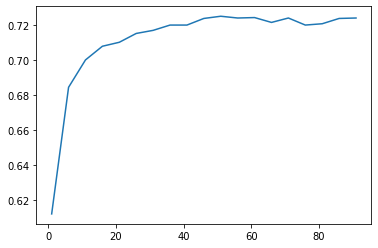

In [202]:
# Draw a graph of decision tree classification accuracy when the size of the training set is varied 
import numpy
ks = range(1,95,5)
accu_list=[]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    

plt.plot(ks,accu_list)
plt.show()


In [203]:
# week 10 refer
m = 'MEDV_h = -3.84 + 5.47*RM -0.63*LSTAT'
y_test_h = Data_p.predict(X_test)
y_train_h = Data_p.predict(X_train)

residual_train = [y - yh for y, yh in zip(y_train, y_train_h)]
residual_test = [y - yh for y, yh in zip(y_test, y_test_h)]

plt.scatter(y_test_h, residual_test, color='C0', label = 'R^2 (test):{0:.2f}'.format(r2_test))
plt.scatter(y_train_h, residual_train, color='C4', alpha = 0.1, label = 'R^2 (training):{0:.2f}'.format(r2_train))
plt.plot([min(y_train_h), max(y_train_h)], [0,0], color= 'C2')
plt.legend()
plt.title("Residule plot\n{}".format(m))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'predict'

In [205]:
def bin_rating(x):
    """
   Equal length descritisation.
    
        [min, 4080.605), [4080.605, 5452.68), [5452.68, 6824.755 ) [6824.755, max]
        
        min = 2708.53
        max = 8196.83

    
    """
    LOWER = 4080.605

    MID = 5452.68
    
    UPPER = 6824.755

    
    # [min, 4080.605)
    if x < LOWER:        
        return 1
    
    #  [4080.605, 5452.68)
    elif LOWER <= x < MID:
        return 2 
    
    #  [5452.68, 6824.755 ) 
   
    elif MID <= x < UPPER:
        return 3

   #[6824.755, max]
    return 4

# apply the function on the series
MergeData['bin_rating'] = MergeData['TOTALDEMAND'].apply(bin_rating)

# also, print out the min/max for this feature
MergeData

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,avg_temp,bin_rating
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,77,...,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75,2
2021-01-02,13.4,20.3,0.0,7.4,1.6,S,33,21:08,16.9,76,...,1012.8,19.4,69,7,S,13,1011.9,5228.29,16.85,2
2021-01-03,13.8,21.7,0.0,6.4,6.3,S,44,18:35,16.6,72,...,1012.3,19.7,67,6,S,15,1012.2,5225.37,17.75,2
2021-01-04,12.4,29.9,0.0,4.4,10.8,NW,20,11:49,14.4,86,...,1024.3,28.7,30,3,SE,7,1021.6,5807.02,21.15,3
2021-01-05,11.2,24.6,0.0,5.4,7.1,N,33,12:48,14.9,63,...,1027.3,24.2,35,7,N,17,1024.4,5261.09,17.90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,14.9,30.3,0.0,4.0,10.1,N,26,12:35,17.9,94,...,1016.7,29.0,36,7,NE,9,1012.6,6115.65,22.60,3
2021-12-04,9.7,16.8,10.0,3.2,3.9,W,28,2:30,11.7,95,...,1023.7,16.0,65,6,SW,11,1021.8,6415.58,13.25,3
2021-12-06,7.4,16.5,9.4,0.4,1.0,NW,33,12:32,12.7,85,...,1014.4,15.5,61,7,W,11,1014.0,6062.58,11.95,3


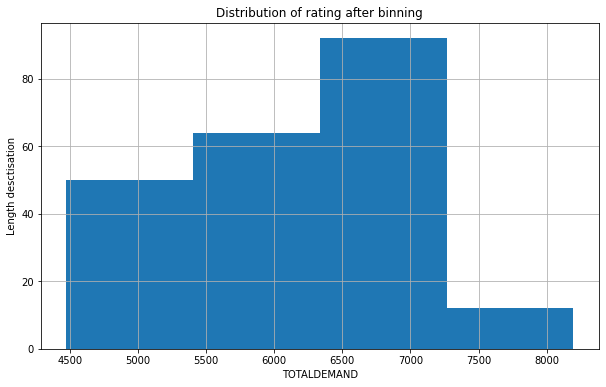

In [206]:
# Length Descretization
MergeData.TOTALDEMAND.hist(bins = 4, figsize = (10,6))
plt.xlabel("TOTALDEMAND")
plt.ylabel("Length desctisation")
plt.title('Distribution of rating after binning')


plt.show()

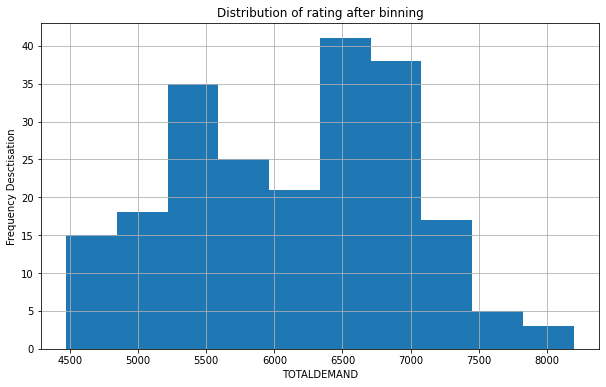

In [207]:
# Frequency Descretization
             
MergeData.TOTALDEMAND.hist(bins = 10, figsize = (10,6))
plt.xlabel("TOTALDEMAND")
plt.ylabel("Frequency Desctisation")
plt.title('Distribution of rating after binning')


plt.show()

<AxesSubplot:title={'center':' Distribution of Evaporation With Increasing Temperature'}, xlabel='Maximum temperature (°C)', ylabel='Evaporation (mm)'>

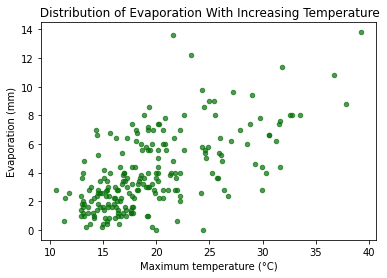

In [138]:
# when the temperature increases, the evaporation increases. So it will gives a linear graph.
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'Evaporation (mm)', title= " Distribution of Evaporation With Increasing Temperature", c = '#07700a', alpha = 0.7)


In [139]:
Linear=['Evaporation (mm)','Maximum temperature (°C)']
MergeData[Linear].corr(method='pearson')

,Evaporation (mm),Maximum temperature (°C)
Evaporation (mm),1.00000,0.62642
Maximum temperature (°C),0.62642,1.00000


In [208]:
#To add an identity line, we try to get the max
myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['Evaporation (mm)']))
myMax

39.2

In [141]:
# get the min

myMin = min(min(MergeData['Evaporation (mm)']), max(MergeData['TOTALDEMAND']))
myMin

0.0

<AxesSubplot:title={'center':'Total Demand with Evaporation'}, xlabel='Evaporation (mm)', ylabel='TOTALDEMAND'>

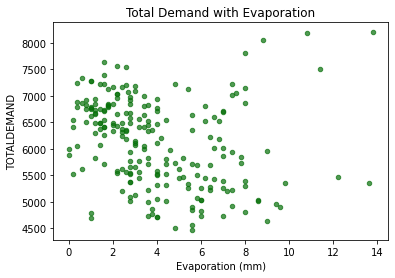

In [209]:
# explain ??????????????????????
MergeData.plot.scatter (x = 'Evaporation (mm)',
                        y = 'TOTALDEMAND',  title= "Total Demand with Evaporation",c = '#07700a', alpha = 0.7)

In [210]:
Linear=['Evaporation (mm)','TOTALDEMAND']
MergeData[Linear].corr(method='pearson')

,Evaporation (mm),TOTALDEMAND
Evaporation (mm),1.000000,-0.245547
TOTALDEMAND,-0.245547,1.000000


In [211]:
# get the max

myMax = max(max(MergeData['Evaporation (mm)']), max(MergeData['TOTALDEMAND']))
myMax

8196.83

In [147]:
# get the min

myMin = min(min(MergeData['Evaporation (mm)']), max(MergeData['TOTALDEMAND']))
myMin

0.0

In [ ]:
# Energy consumption may affect by the other factors too

<AxesSubplot:title={'center':'Impact of Sunshine on Total Demand'}, xlabel='Sunshine (hours)', ylabel='TOTALDEMAND'>

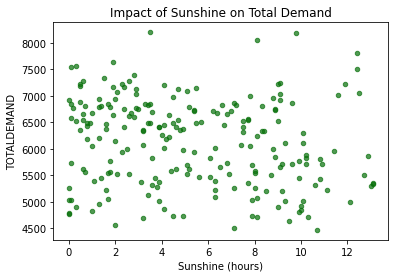

In [148]:
# 1.  sunshne data can be effective on solar energy.When the sunshine increases, the Total demand decreases. negatie linear graph.
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = 'TOTALDEMAND',  title= "Impact of Sunshine on Total Demand",c = '#07700a', alpha = 0.7)

In [212]:
# get the max

myMax = max(max(MergeData['Sunshine (hours)']), max(MergeData['TOTALDEMAND']))
myMax

8196.83

In [213]:
# get the min

myMin = min(min(MergeData['Sunshine (hours)']), max(MergeData['TOTALDEMAND']))
myMin

0.0

<AxesSubplot:title={'center':'Impact of Cloud Amount on Total Demand'}, xlabel='9am cloud amount (oktas)', ylabel='TOTALDEMAND'>

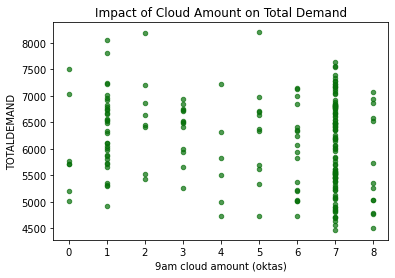

In [215]:
#but the sunshine can be affected by the amount of cloud
MergeData.plot.scatter (x = '9am cloud amount (oktas)',
                        y = 'TOTALDEMAND',  title= "Impact of Cloud Amount on Total Demand",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'How the Cloud Amount Will Impact On Sunshine'}, xlabel='Sunshine (hours)', ylabel='9am cloud amount (oktas)'>

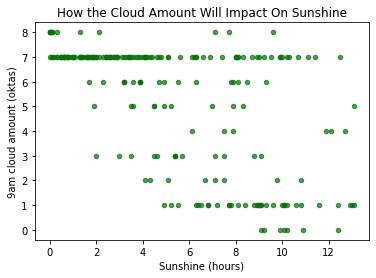

In [217]:
# Less sunshine may due to the cloud amount 
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = '9am cloud amount (oktas)',  title= "How the Cloud Amount Will Impact On Sunshine",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'How the Speed of maximum wind gust Will Impact On Total Demand'}, xlabel='Speed of maximum wind gust (km/h)', ylabel='TOTALDEMAND'>

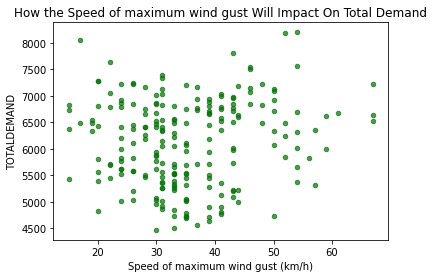

In [218]:

# 2.  Speed of maximum wind gust data can be effective on energy.
MergeData.plot.scatter (x = 'Speed of maximum wind gust (km/h)',
                        y = 'TOTALDEMAND',  title= "How the Speed of maximum wind gust Will Impact On Total Demand",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'Changing Pattern of Relative Humidity with Increasing Temperature'}, xlabel='Maximum temperature (°C)', ylabel='3pm relative humidity (%)'>

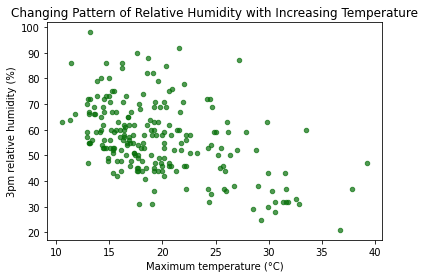

In [219]:

MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = '3pm relative humidity (%)', title = "Changing Pattern of Relative Humidity with Increasing Temperature",c = '#07700a', alpha = 0.7)

In [220]:
Linear=['3pm relative humidity (%)','Maximum temperature (°C)']
MergeData[Linear].corr(method='pearson')



,3pm relative humidity (%),Maximum temperature (°C)
3pm relative humidity (%),1.000000,-0.475883
Maximum temperature (°C),-0.475883,1.000000


In [221]:
# get the max

myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['3pm relative humidity (%)']))
myMax

98

In [222]:
# get the min

myMin = min(min(MergeData['Maximum temperature (°C)']), max(MergeData['3pm relative humidity (%)']))
myMin

10.6

<AxesSubplot:title={'center':'The Impact of Relative Humidity on Total Demand'}, xlabel='3pm relative humidity (%)', ylabel='TOTALDEMAND'>

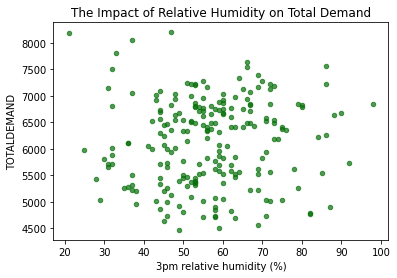

In [223]:
# This has no relationship
MergeData.plot.scatter (x = '3pm relative humidity (%)',
                        y = 'TOTALDEMAND', title = "The Impact of Relative Humidity on Total Demand",c = '#07700a', alpha = 0.7)


In [224]:
[]# get the max

myMax = max(max(MergeData['3pm relative humidity (%)']), max(Data_pg['TOTALDEMAND']))
myMax

8196.83

In [225]:
# get the min

myMin = min(min(MergeData['3pm relative humidity (%)']), max(Data_pg['TOTALDEMAND']))
myMin

21

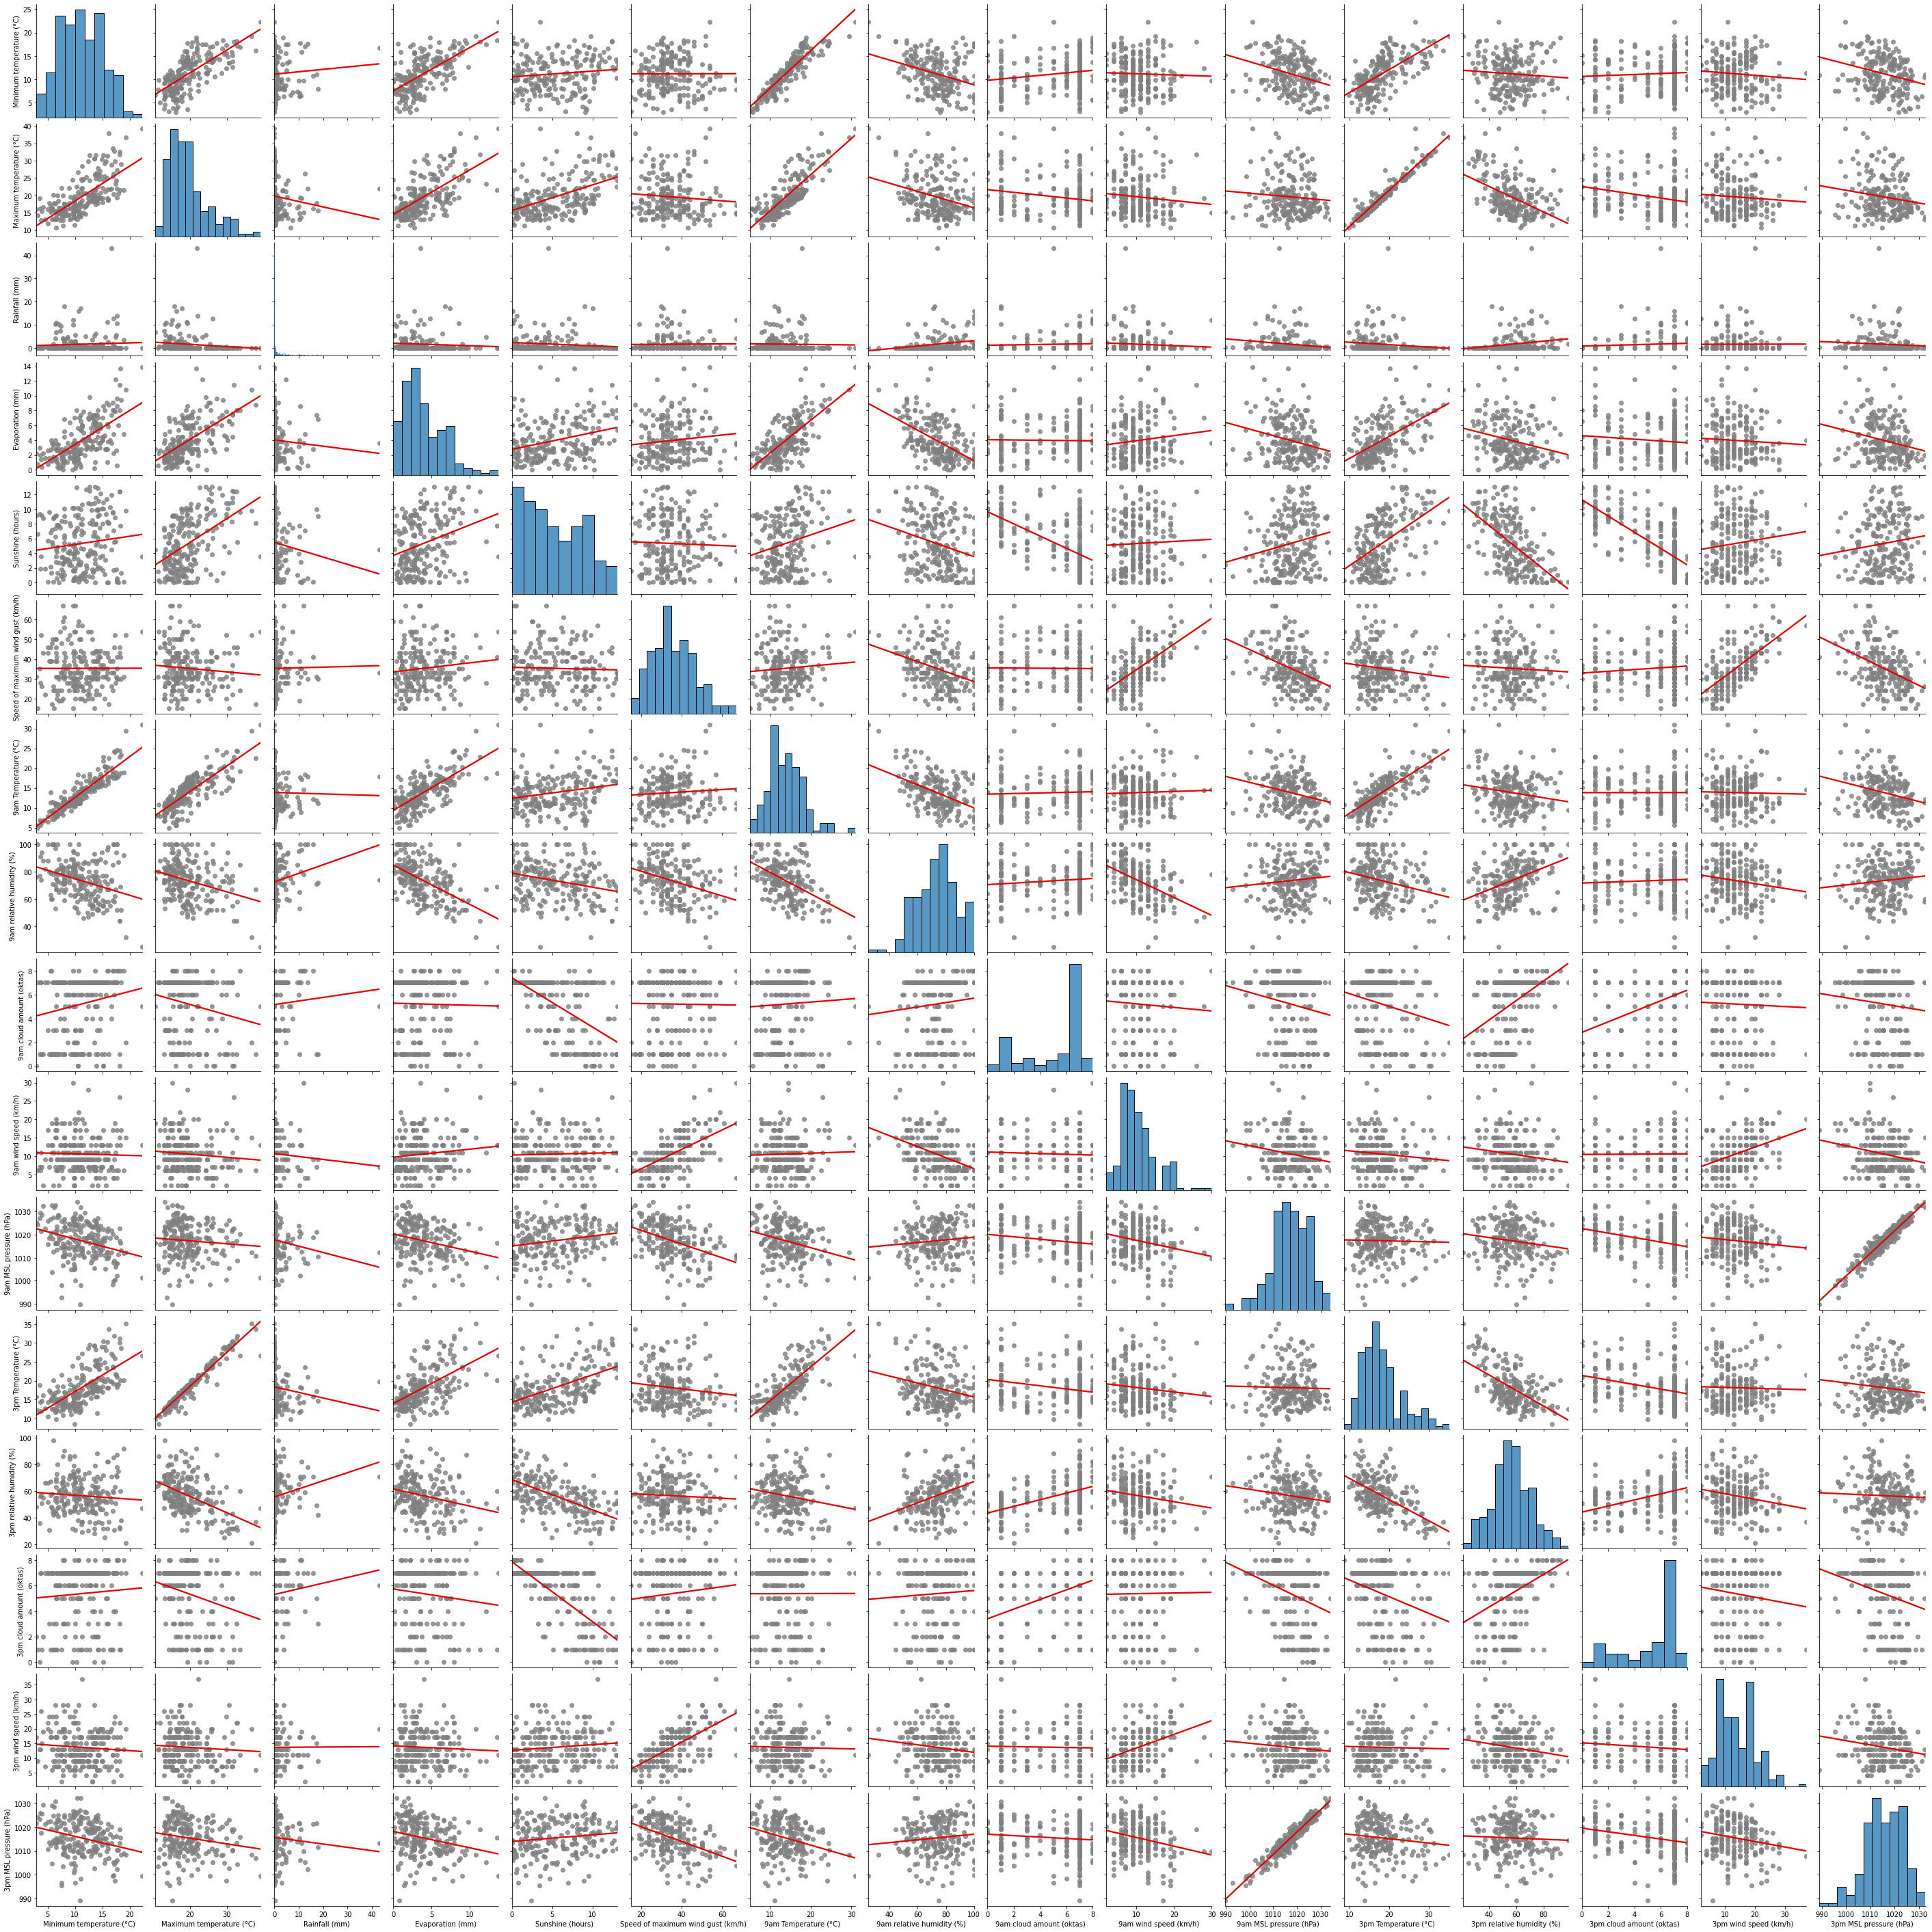

In [94]:
sns.pairplot(Data_w, kind = 'reg', plot_kws = {'ci':None, 'color':'xkcd:red', 'scatter_kws': {'color':'gray'}})

Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

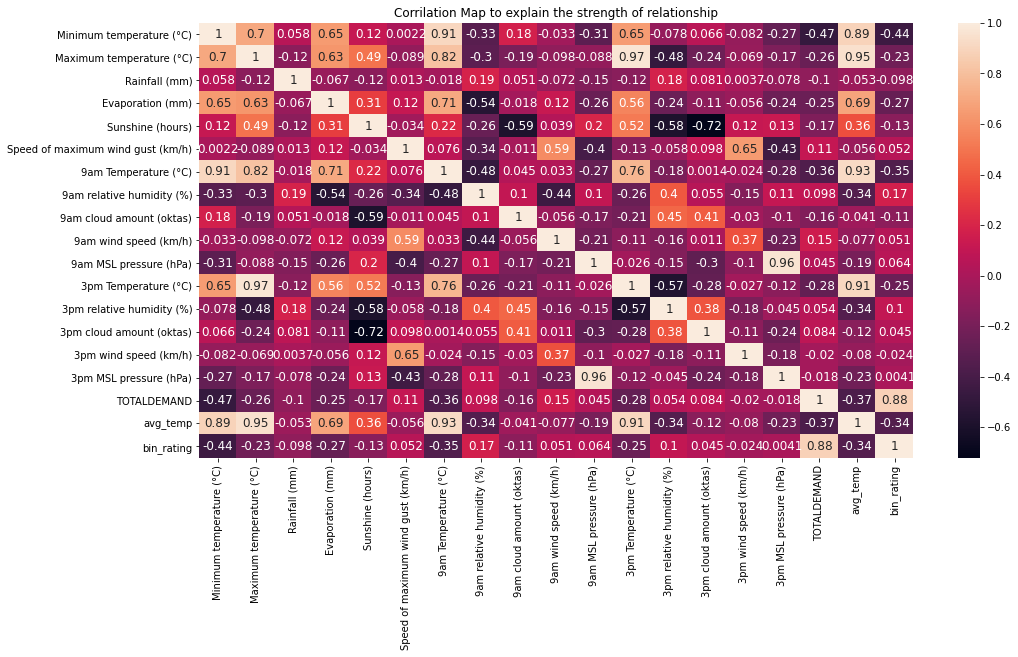

In [90]:
# Corrilarion values- Strong positive corrilations has light colour, negative corrilations has dark colour.
plt.figure(figsize=(16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws={"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


In [226]:
MergeData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 2021-01-01 to 2021-12-08
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Minimum temperature (°C)           218 non-null    float64
 1   Maximum temperature (°C)           218 non-null    float64
 2   Rainfall (mm)                      218 non-null    float64
 3   Evaporation (mm)                   218 non-null    float64
 4   Sunshine (hours)                   218 non-null    float64
 5   Direction of maximum wind gust     218 non-null    object 
 6   Speed of maximum wind gust (km/h)  218 non-null    int64  
 7   Time of maximum wind gust          218 non-null    object 
 8   9am Temperature (°C)               218 non-null    float64
 9   9am relative humidity (%)          218 non-null    int64  
 10  9am cloud amount (oktas)           218 non-null    int64  
 11  9am wind direction                 218 

In [227]:
##  Evaluation
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = MergeData[['Maximum temperature (°C)']]
y = MergeData['TOTALDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# initialise the model
lm = linear_model.LinearRegression()


#model = lm.fit(X_train, y_train)

model = lm.fit(X_train , y_train)

y_test_predictions = lm.predict(X_test)
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))


actual MEDV values of the first 5 test data:
Date
2021-05-07    7629.77
2021-12-06    6062.58
2021-06-27    6381.64
2021-08-17    6849.04
2021-01-21    7046.57
Name: TOTALDEMAND, dtype: float64

predicted MEDV values of the first 5 test data:
[6381.66523361 6233.48482015 6285.7837896  6346.79925397 5575.38945449]

Coefficients:  [-43.58247455]

Intercept:  6952.5956501693145

Coefficient of determination (test): 0.04
Coefficient of determination (training): 0.08


KeyError: 'Date'

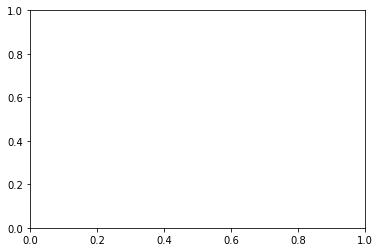

In [228]:
# Scatter plot showing the relationship between the Total Demand each day
Data_p.plot.scatter (x = 'Date',
                    y = 'TOTALDEMAND', title = "The Total Demand with time",c = '#07700a', alpha = 0.7)    

In [229]:
# Check Data types
Data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
dtypes: float64(1), object(3)
memory usage: 364.6+ KB


<AxesSubplot:title={'center':'The Total Demand with time'}, xlabel='PRICECATEGORY', ylabel='TOTALDEMAND'>

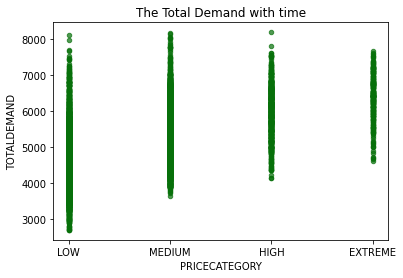

In [230]:

# Make them into clusters
Data_p.plot.scatter (x = 'PRICECATEGORY',
                    y = 'TOTALDEMAND', title = "The Total Demand with time",c = '#07700a', alpha = 0.7) 

In [231]:
Data_pc = pd.get_dummies(Data_p, columns = ['PRICECATEGORY'])
Data_pc

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY_EXTREME,PRICECATEGORY_HIGH,PRICECATEGORY_LOW,PRICECATEGORY_MEDIUM
0,VIC1,1/01/2021 0:30,4179.21,0,0,1,0
1,VIC1,1/01/2021 1:00,4047.76,0,0,1,0
2,VIC1,1/01/2021 1:30,3934.70,0,0,1,0
3,VIC1,1/01/2021 2:00,3766.45,0,0,1,0
4,VIC1,1/01/2021 2:30,3590.37,0,0,1,0
...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,0,0,0,1
11660,VIC1,31/08/2021 22:30,4748.74,0,0,0,1
11661,VIC1,31/08/2021 23:00,4620.09,0,0,0,1
11662,VIC1,31/08/2021 23:30,4834.00,0,0,0,1


In [232]:
# Count values of PriceCategory data entries
Data_p['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

(-1.1112762702946841,
 1.1005369652521277,
 -1.1087674267121206,
 1.1069554353271198)

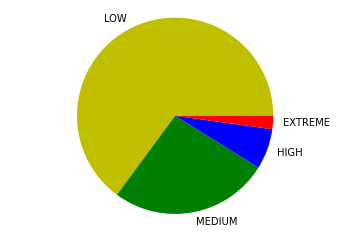

In [233]:
# explaining the price category in pie chart
P_CATEGORY=["LOW","MEDIUM","HIGH","EXTREME"]
co2=[7570, 3061,777,256]
colors=['y','g','b','r' ]
plt.pie(co2,explode=None,labels=P_CATEGORY,colors=colors)
plt.axis('equal')

In [239]:
# calculating the normalised mutual information for the two categorical variables.( small number means weak relationship) 

nmi(Data_pc['SETTLEMENTDATE'], Data_pc['PRICECATEGORY'])

KeyError: 'PRICECATEGORY'

In [171]:
# compare our prediction with the real class label and report the overall accuracy.
y_pred=dt.predict(X_test)
print(accuracy_score(y_test, y_pred))    


AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'